<a href="https://colab.research.google.com/github/TakaNori999/ML_Class/blob/main/FCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
#@title データの作成
# モジュール
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.utils import to_categorical
import pandas as pd
import matplotlib.pyplot as plt

# データのダウンロード
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(-1, 784).astype("float32") / 255.0
X_test  = X_test.reshape(-1, 784).astype("float32") / 255.0
y_train = to_categorical(y_train, 10)
y_test  = to_categorical(y_test, 10)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [5]:
#@title 中間層の構成
# 中間層の構成
UNITS_FC1 = 32 #@param {type:"slider", min:32, max:512, step:32}
UNITS_FC2 = 0 #@param {type:"slider", min:0, max:512, step:32}
UNITS_FC3 = 0 #@param {type:"slider", min:0, max:512, step:32}
UNITS_FC4 = 0 #@param {type:"slider", min:0, max:512, step:32}
UNITS_FC5 = 0 #@param {type:"slider", min:0, max:512, step:32}

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ inp (InputLayer)                │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc1 (Dense)                     │ (None, 32)             │        25,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ logits (Dense)                  │ (None, 10)             │           330 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ softmax (Activation)            │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25,450 (99.41 KB)

 Trainable params: 25,450 (99.41 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.6762 - loss: 1.1210 - val_accuracy: 0.9004 - val_loss: 0.3745
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8984 - loss: 0.3695 - val_accuracy: 0.9158 - val_loss: 0.3062
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9125 - loss: 0.3138 - val_accuracy: 0.9236 - val_loss: 0.2790
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9195 - loss: 0.2898 - val_accuracy: 0.9272 - val_loss: 0.2604
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9252 - loss: 0.2660 - val_accuracy: 0.9300 - val_loss: 0.2480
Test ACC: 0.9300000071525574


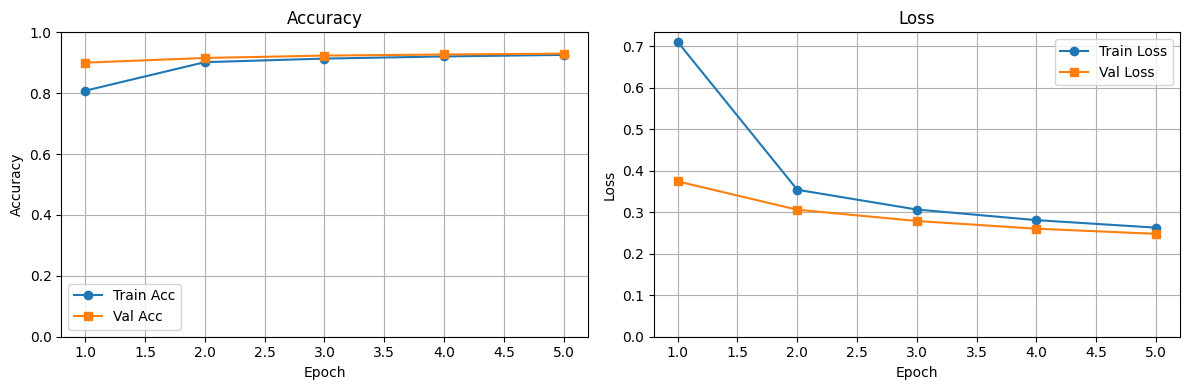

In [17]:
#@title 学習モデルのトレーニング
EPOCHS = 5  #@param {type:"slider", min:1, max:20, step:1}

#学習モデルの作成
inputs = tf.keras.Input(shape=(784,), name="inp")
x = tf.keras.layers.Dense(UNITS_FC1, activation="relu", name="fc1")(inputs)
if UNITS_FC2 > 0:
    x = tf.keras.layers.Dense(UNITS_FC2, activation="relu", name="fc2")(x)
if UNITS_FC3 > 0:
    x = tf.keras.layers.Dense(UNITS_FC3, activation="relu", name="fc3")(x)
if UNITS_FC4 > 0:
    x = tf.keras.layers.Dense(UNITS_FC4, activation="relu", name="fc4")(x)
if UNITS_FC5 > 0:
    x = tf.keras.layers.Dense(UNITS_FC5, activation="relu", name="fc5")(x)
logits = tf.keras.layers.Dense(10, name="logits")(x)
outputs = tf.keras.layers.Activation("softmax", name="softmax")(logits)
model = tf.keras.Model(inputs, outputs)
model.compile(optimizer="SGD", loss="categorical_crossentropy", metrics=["accuracy"])
model.summary()

# 学習の実行
history = model.fit(X_train, y_train, epochs=EPOCHS, batch_size=32, verbose=1, validation_data=(X_test, y_test))
test_acc = model.evaluate(X_test, y_test, verbose=0)[1]
print("Test ACC:", test_acc)

# 学習履歴の表示
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

# --- Accuracy ---
ax[0].plot(epochs, acc, marker='o', label='Train Acc')
ax[0].plot(epochs, val_acc, marker='s', label='Val Acc')
ax[0].set_title('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Accuracy')
ax[0].set_ylim(0, 1.0)
ax[0].grid(True)
ax[0].legend()

# --- Loss ---
ax[1].plot(epochs, loss, marker='o', label='Train Loss')
ax[1].plot(epochs, val_loss, marker='s', label='Val Loss')
ax[1].set_title('Loss')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Loss')
ax[1].set_ylim(0, None)
ax[1].grid(True)
ax[1].legend()

plt.tight_layout()
plt.show()

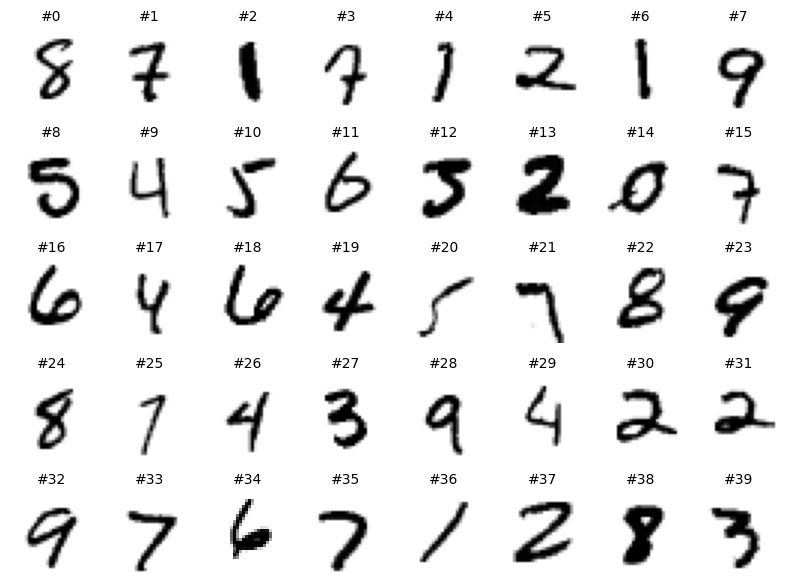

In [18]:
#@title テスト画像の表示
# 画像の白黒反転
USE_INVERT_GRAY = True
def show_overlay(img2d, heat2d, title="", alpha=0.5, cmap="jet"):
    if USE_INVERT_GRAY:
        plt.imshow(img2d, cmap="gray_r")
    else:
        plt.imshow(img2d, cmap="gray")
    plt.imshow(heat2d, cmap=cmap, alpha=alpha)
    plt.axis("off"); plt.title(title)

# 画像の変形
def get_sample_for_mlp(X, idx):
    x_vec = X[idx].reshape(1, 784)
    img2d = X[idx].reshape(28, 28)
    return x_vec, img2d

# テスト画像の選択
N = 40
np.random.seed(0)
gallery_idx = np.random.choice(len(X_test), size=N, replace=False)
gallery_map = {i: int(idx) for i, idx in enumerate(gallery_idx)}

rows, cols = 5, 8
plt.figure(figsize=(8, 6))
for i, idx in enumerate(gallery_idx):
    _, img2d = get_sample_for_mlp(X_test, idx)
    plt.subplot(rows, cols, i+1)
    plt.imshow(img2d, cmap='gray_r' if USE_INVERT_GRAY else 'gray'); plt.axis('off')
    plt.title(f"#{i}", fontsize=10)
plt.tight_layout(); plt.show()

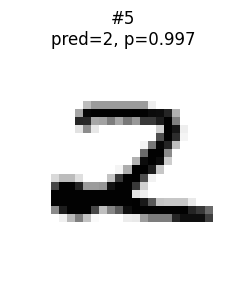

In [22]:
#@title 未知画像の予測
# 予測するカード番号
INDEXES = [5] #@param {type:"raw"}
# 画像の予測
plt.figure(figsize=(10, 3*len(INDEXES)))
for r, local_id in enumerate(INDEXES, start=1):
    idx = gallery_map[local_id]
    x_vec, img2d = get_sample_for_mlp(X_test, idx)

    y_true = int(np.argmax(y_test[idx])) if y_test.ndim > 1 else int(y_test[idx])

    prob = model.predict(x_vec, verbose=0)[0]
    pred = int(np.argmax(prob)); conf = float(np.max(prob))

    plt.subplot(len(INDEXES), 2, 2*r-1)
    plt.imshow(img2d, cmap='gray_r' if USE_INVERT_GRAY else 'gray'); plt.axis('off')
    plt.title(f"#{local_id}\npred={pred}, p={conf:.3f}")

plt.tight_layout(); plt.show()